In [ ]:
pip install pandas==1.3.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from math import sqrt

In [ ]:
df = pd.read_xml('/content/drive/MyDrive/Colab Notebooks/electric power.xml')
df['DATE'] = pd.to_datetime(df['DATE']).dt.date
df.head()
#df.describe()

,VALUE,DATE,HOUR
0,243887.0,2009-01-01,1
1,243068.0,2009-01-01,2
2,242266.0,2009-01-01,3
3,242659.0,2009-01-01,4
4,243724.0,2009-01-01,5


In [ ]:
df = df.drop('HOUR', 1)
df = df.groupby('DATE', as_index= False).sum()
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,DATE,VALUE
0,2009-01-01,5830312.0
1,2009-01-02,5597619.0
2,2009-01-03,5825879.0
3,2009-01-04,5410538.0
4,2009-01-05,4225877.0


Text(0.5, 0, 'N дня')

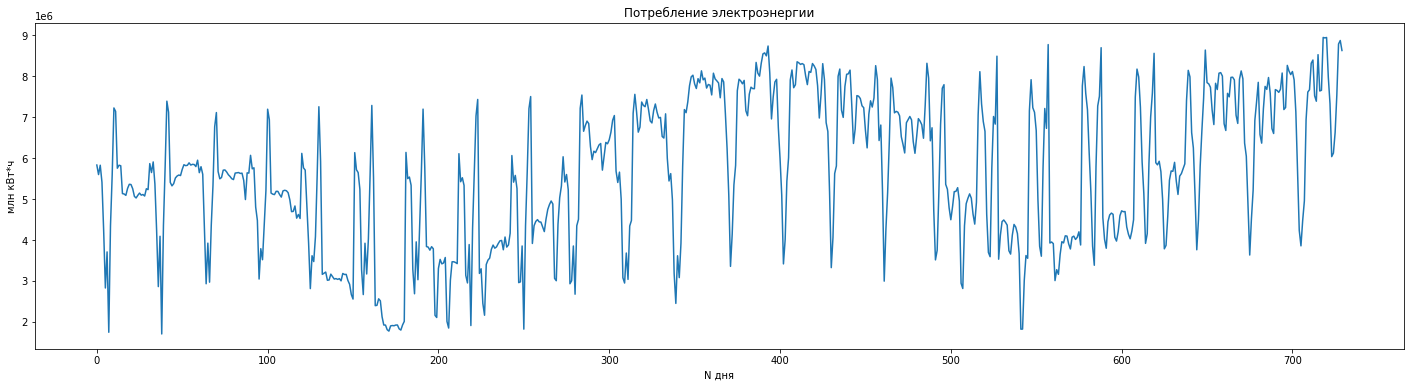

In [ ]:
fig = plt.figure(figsize=(54, 6))
ax = fig.add_subplot(121)
df['VALUE'].plot()
ax.set_title(u'Потребление электроэнергии')
ax.set_ylabel(u'млн кВт*ч')
ax.set_xlabel(u'N дня')

In [ ]:
new_date = pd.date_range('2011-01-01', '2011-01-07')
print(new_date)

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07'],
              dtype='datetime64[ns]', freq='D')


In [ ]:
new_dates = pd.Index(df['DATE']) | new_date
df2 = pd.DataFrame({'DATE': new_dates})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  """Entry point for launching an IPython kernel.


In [ ]:
df = pd.merge(df, df2, on='DATE', how='right')

In [ ]:
df['day_num'] = range(1, len(df) + 1)
for x in range(1, 32):
   df['day' + str(x)] = (df['DATE'].dt.day == x).astype(int)
season_columns = ['day' + str(x) for x in range(1, 32)]

for x in range(1, 13):
    df['season' + str(x)] = (df['DATE'].dt.month == x).astype(int)
season_columns = ['season' + str(x) for x in range(2, 13)]
display(df)

,DATE,VALUE,day_num,day1,day2,day3,day4,day5,day6,day7,day8,day9,day10,day11,day12,day13,day14,day15,day16,day17,day18,day19,day20,day21,day22,day23,day24,day25,day26,day27,day28,day29,day30,day31,season1,season2,season3,season4,season5,season6,season7,season8,season9,season10,season11,season12
0,2009-01-01,5830312.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2009-01-02,5597619.0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2009-01-03,5825879.0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2009-01-04,5410538.0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2009-01-05,4225877.0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,2011-01-03,NaN,733,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
733,2011-01-04,NaN,734,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
734,2011-01-05,NaN,735,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
735,2011-01-06,NaN,736,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df['VALUE']
X = df.drop(['DATE', 'VALUE'], axis=1)
y1 = y[y.index < 730]
X1 = X[X.index < 730]
model = LinearRegression()
model.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

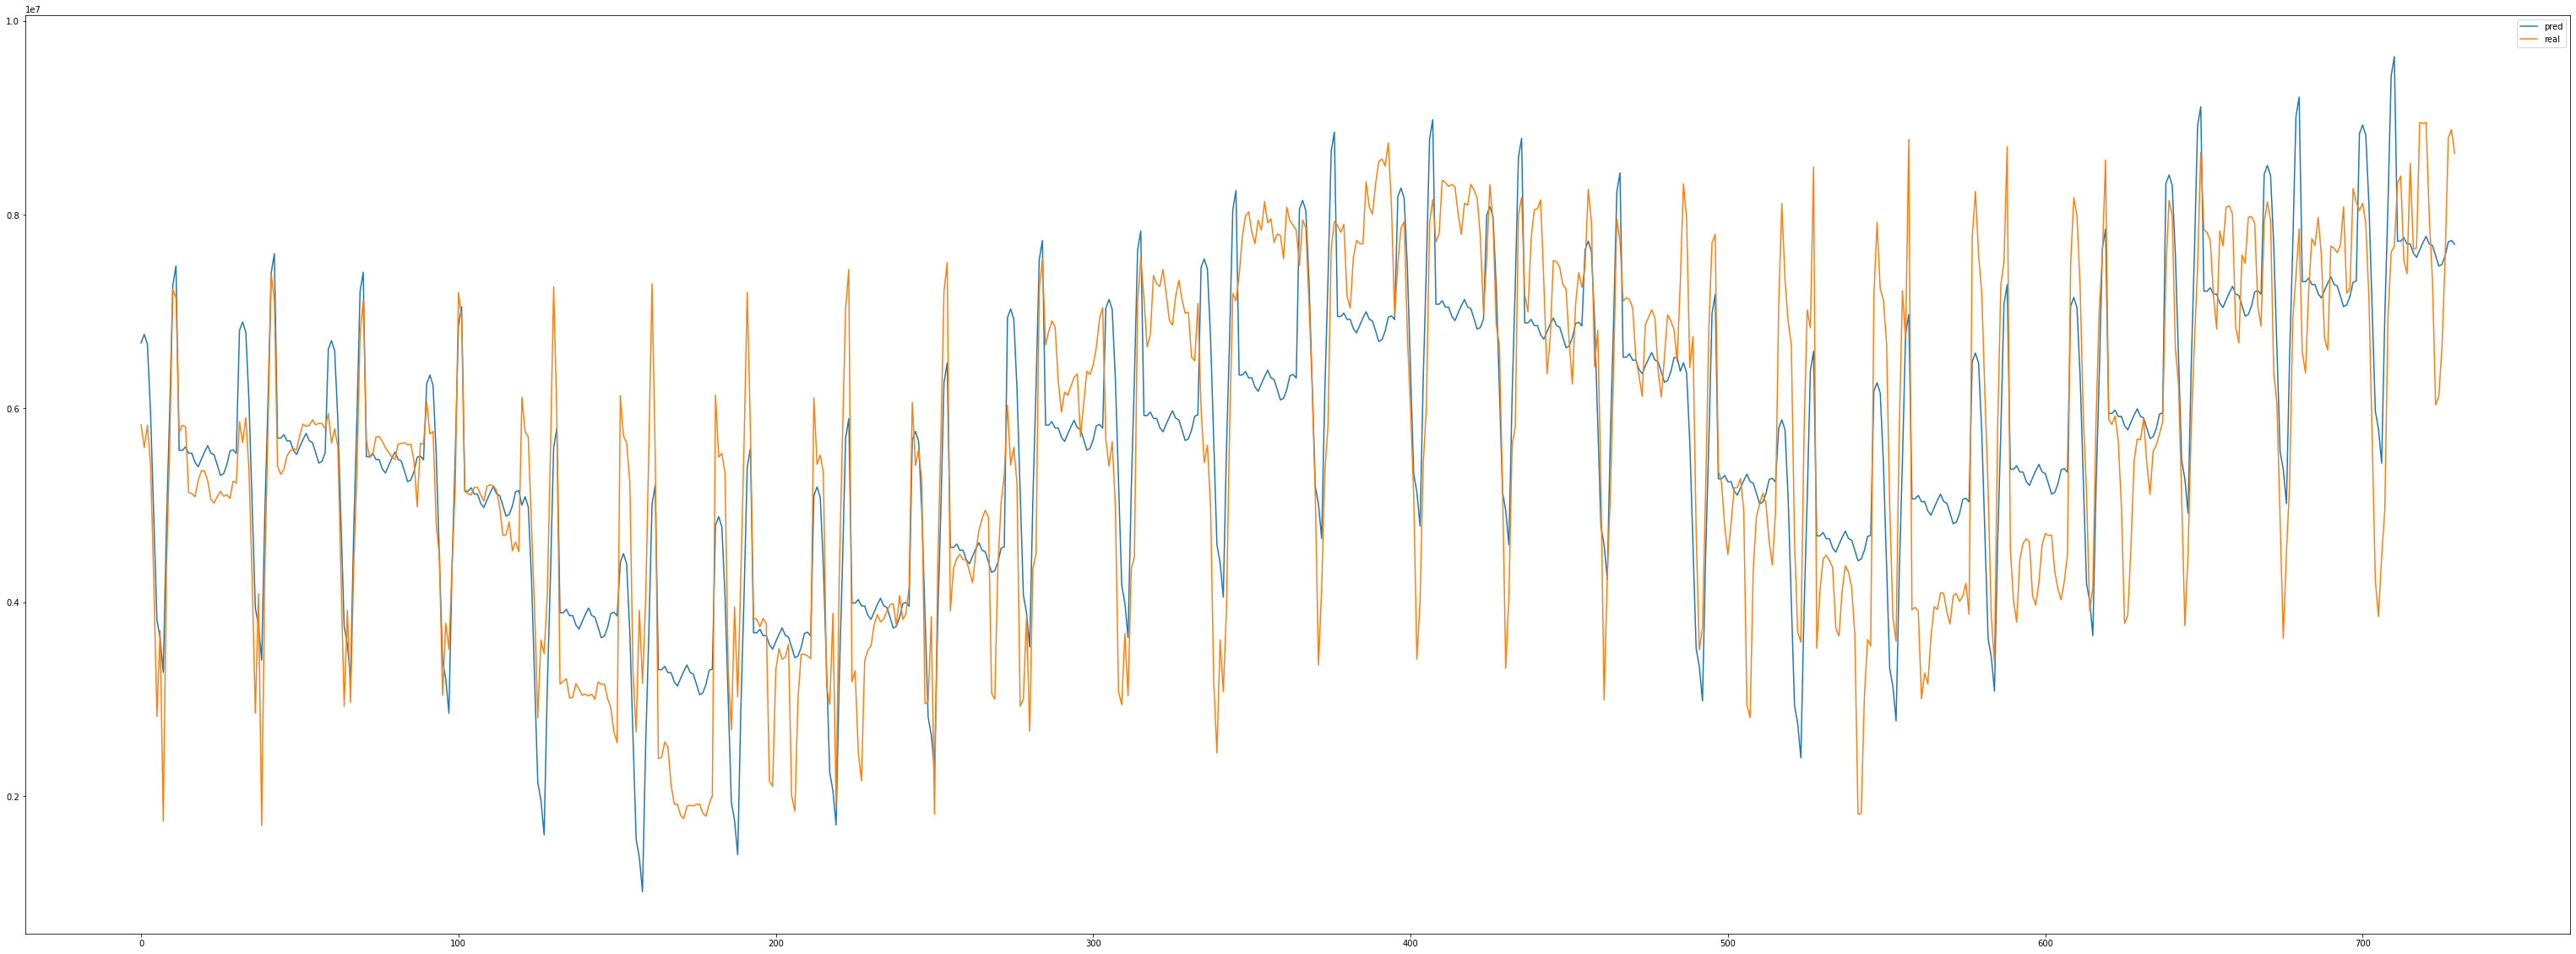

In [ ]:
pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': y1})
pred.plot(figsize=(54, 20))

In [ ]:
print("MSE =",sqrt(np.sum((model.predict(X1) - y1) ** 2) /len(y1)))
print("Коэффициент детерминации =",np.sum((model.predict(X1) - np.mean(y1))**2)/np.sum((y1 - np.mean(y1))**2))
print("Коэффициент несоответствия Тейла =", sqrt(np.sum((model.predict(X1) - y1) ** 2)/(np.sum(y1**2)+np.sum(model.predict(X1)**2))))

MSE = 971961.1468201496
Коэффициент детерминации = 0.7018070313002484
Коэффициент несоответствия Тейла = 0.11756178066672315


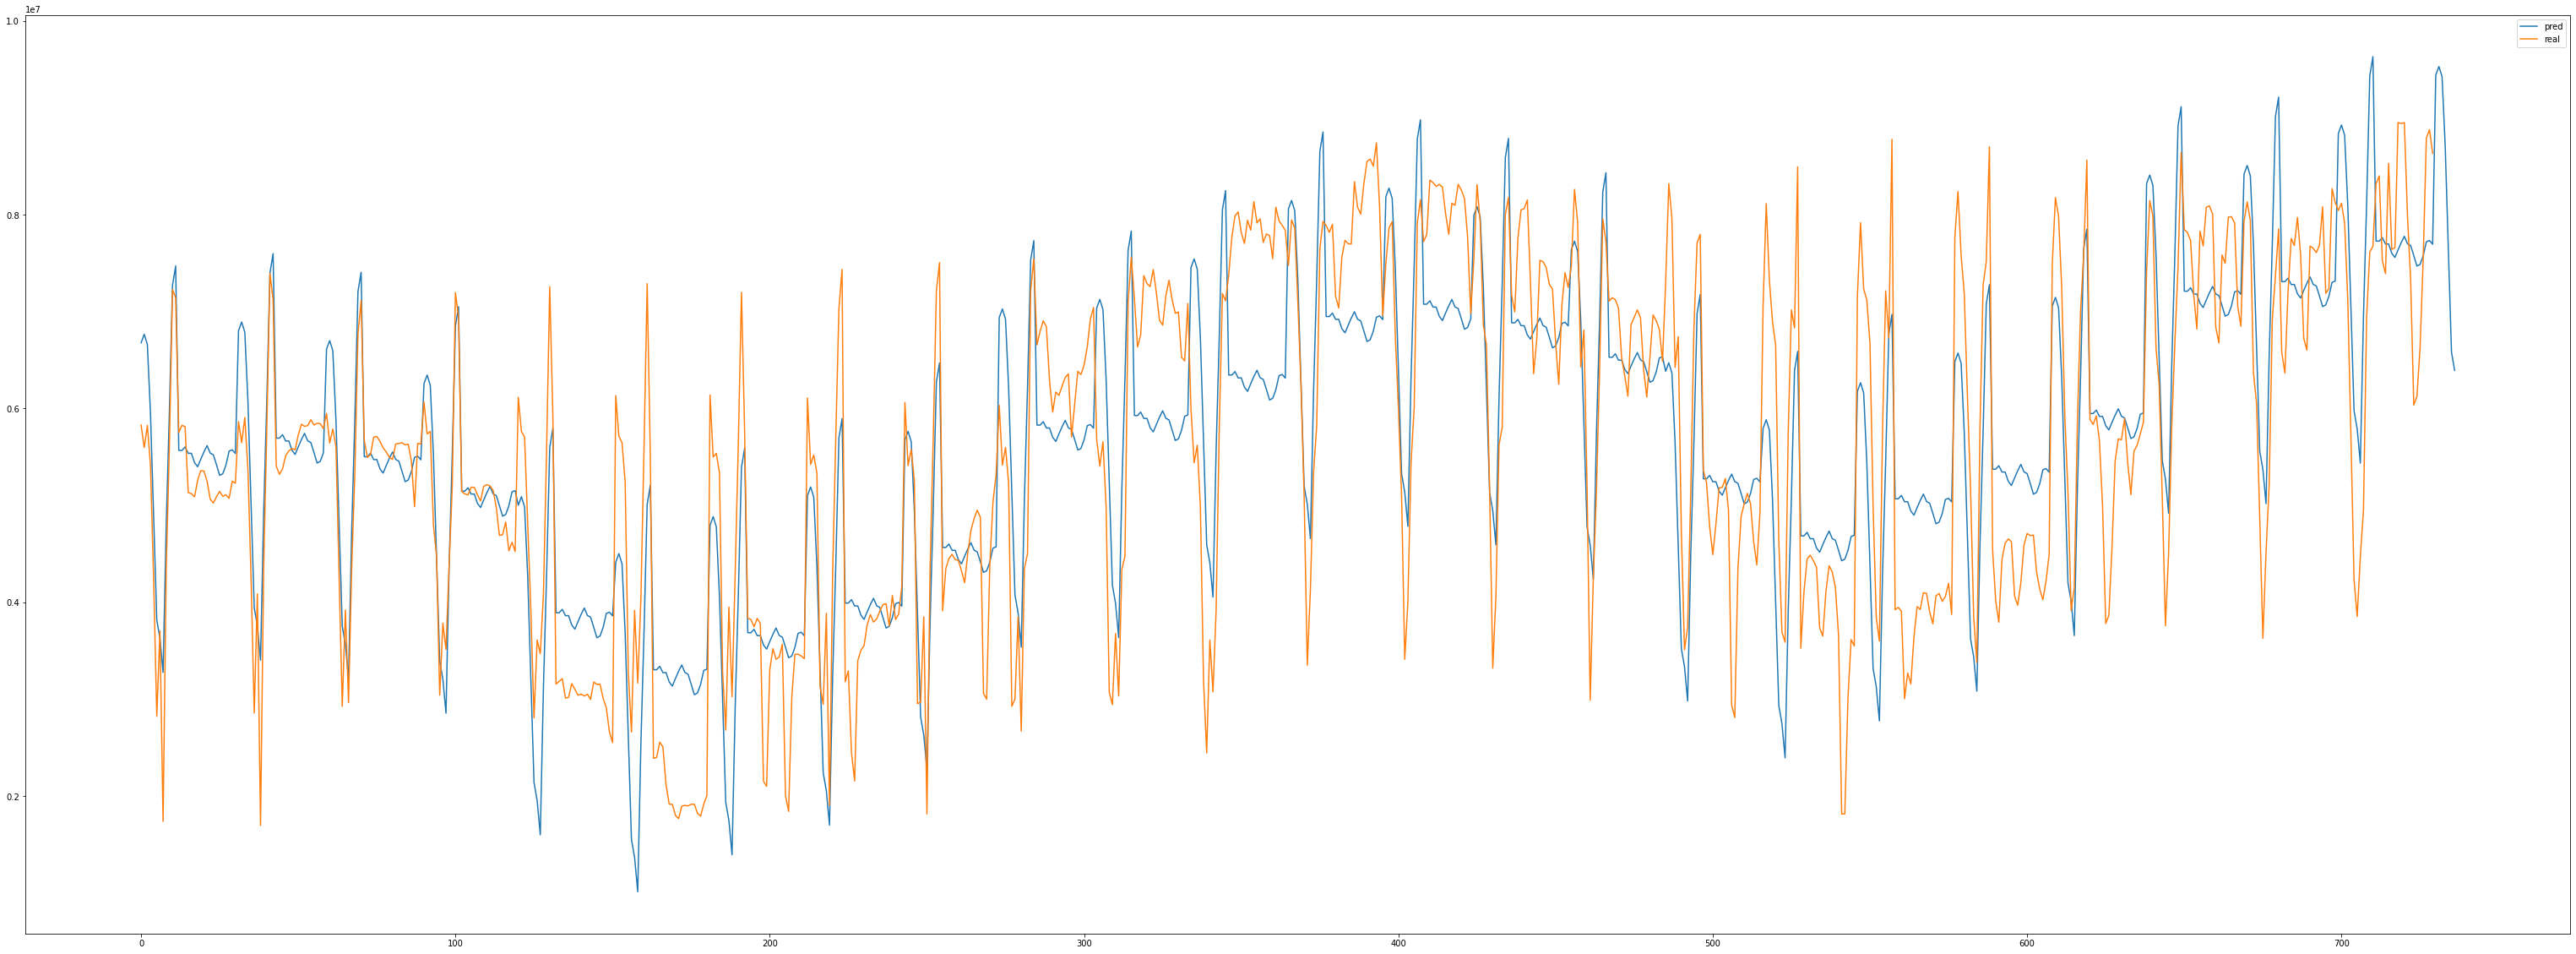

In [ ]:
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot(figsize=(54, 20))

In [ ]:
preddf = model.predict(X)
preddf = preddf[-7:]
date = ['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04', '2011-01-05', '2011-01-06', '2011-01-07']
preddf = np.column_stack([date, preddf])
preddf = pd.DataFrame(preddf, index=range(len(date)), columns= ("DATE", "VALUE"))
display(preddf)

,DATE,VALUE
0,2011-01-01,9440384.413310954
1,2011-01-02,9528510.621644288
2,2011-01-03,9423085.121644285
3,2011-01-04,8705888.579977619
4,2011-01-05,7633431.246644285
5,2011-01-06,6580081.579977617
6,2011-01-07,6392978.996644285
